In [1]:
# All Continuous Data is Binning or Engineered 
# Importing Data from Excel into Python as DataFrame
# Binning everything except X18-X23 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import iqr
plt.style.use('ggplot')
from sklearn import preprocessing

In [3]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_excel("default.xls", index_col=0, header=0)
df = df.iloc[1:, :]
# Checking import 
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
# Checking out the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
X1     30000 non-null object
X2     30000 non-null object
X3     30000 non-null object
X4     30000 non-null object
X5     30000 non-null object
X6     30000 non-null object
X7     30000 non-null object
X8     30000 non-null object
X9     30000 non-null object
X10    30000 non-null object
X11    30000 non-null object
X12    30000 non-null object
X13    30000 non-null object
X14    30000 non-null object
X15    30000 non-null object
X16    30000 non-null object
X17    30000 non-null object
X18    30000 non-null object
X19    30000 non-null object
X20    30000 non-null object
X21    30000 non-null object
X22    30000 non-null object
X23    30000 non-null object
Y      30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [5]:
df = df.astype(int)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
# Separating Target from rest of data 
target = df.iloc[:, -1:]
target.head()

# Taking target out of main dataframe 
df = df.iloc[:, :-1]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

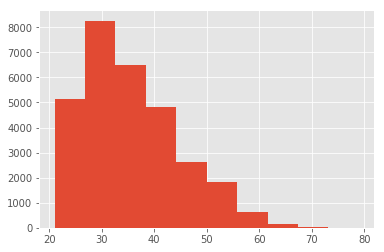

In [8]:
# Distribution of Age in the Dataset 
df['X5'].hist()
df['X5'].describe()

In [9]:
# Trying to create bins out of the age variable
pd.qcut(df['X5'], 3)
# Creating 3 equal height bins for Age 

1        (20.999, 30.0]
2        (20.999, 30.0]
3          (30.0, 39.0]
4          (30.0, 39.0]
5          (39.0, 79.0]
6          (30.0, 39.0]
7        (20.999, 30.0]
8        (20.999, 30.0]
9        (20.999, 30.0]
10         (30.0, 39.0]
11         (30.0, 39.0]
12         (39.0, 79.0]
13         (39.0, 79.0]
14       (20.999, 30.0]
15       (20.999, 30.0]
16       (20.999, 30.0]
17       (20.999, 30.0]
18         (39.0, 79.0]
19         (39.0, 79.0]
20       (20.999, 30.0]
21         (30.0, 39.0]
22         (30.0, 39.0]
23       (20.999, 30.0]
24         (39.0, 79.0]
25       (20.999, 30.0]
26       (20.999, 30.0]
27       (20.999, 30.0]
28       (20.999, 30.0]
29         (39.0, 79.0]
30       (20.999, 30.0]
              ...      
29971      (30.0, 39.0]
29972      (30.0, 39.0]
29973      (30.0, 39.0]
29974      (30.0, 39.0]
29975      (30.0, 39.0]
29976      (39.0, 79.0]
29977      (39.0, 79.0]
29978      (30.0, 39.0]
29979      (30.0, 39.0]
29980      (30.0, 39.0]
29981      (39.0

In [10]:
def binning(X5):
    if X5 > 20 and X5 <= 30:                
        return(0)
    if X5 > 30 and X5 <= 39:        
        return(1)
    if X5 > 39:      
        return(2)
df['X5_Bins'] = df['X5'].apply(binning)
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5_Bins
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,2
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,1
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,1


In [11]:
df = df.drop(['X5'], axis=1)

In [12]:
df['X6_BI']= np.where(df['X6']>0 ,1,0)
df['X7_BI']= np.where(df['X7']>0 ,1,0)
df['X8_BI']= np.where(df['X8']>0 ,1,0)
df['X9_BI']= np.where(df['X9']>0 ,1,0)
df['X10_BI']= np.where(df['X10']>0 ,1,0)
df['X11_BI']= np.where(df['X11']>0 ,1,0)
df.head()

,X1,X2,X3,X4,X6,X7,X8,X9,X10,X11,...,X21,X22,X23,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI
1,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,0,1,1,0,0,0,0
2,120000,2,2,2,-1,2,0,0,0,2,...,1000,0,2000,0,0,1,0,0,0,1
3,90000,2,2,2,0,0,0,0,0,0,...,1000,1000,5000,1,0,0,0,0,0,0
4,50000,2,2,1,0,0,0,0,0,0,...,1100,1069,1000,1,0,0,0,0,0,0
5,50000,1,2,1,-1,0,-1,0,0,0,...,9000,689,679,2,0,0,0,0,0,0


In [13]:
df = df.drop(['X6', 'X7', 'X8', 'X10', 'X11', 'X9'], axis=1)

In [14]:
df['X12_BI']= np.where(df['X12']>0 ,1,0)
df['X13_BI']= np.where(df['X13']>0 ,1,0)
df['X14_BI']= np.where(df['X14']>0 ,1,0)
df['X15_BI']= np.where(df['X15']>0 ,1,0)
df['X16_BI']= np.where(df['X16']>0 ,1,0)
df['X17_BI']= np.where(df['X17']>0 ,1,0)
df.head(5)

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X8_BI,X9_BI,X10_BI,X11_BI,X12_BI,X13_BI,X14_BI,X15_BI,X16_BI,X17_BI
1,20000,2,2,1,3913,3102,689,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,0,0,0,1,1,1,1,1,1,1
3,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,0,0,0,0,1,1,1,1,1,1
4,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,0,0,0,0,1,1,1,1,1,1
5,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,0,0,0,0,1,1,1,1,1,1


In [15]:
df['X12_ABS'] = abs(df['X12'])
df['X13_ABS'] = abs(df['X13'])
df['X14_ABS'] = abs(df['X14'])
df['X15_ABS'] = abs(df['X15'])
df['X16_ABS'] = abs(df['X16'])
df['X17_ABS'] = abs(df['X17'])
df.head(5)

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X14_BI,X15_BI,X16_BI,X17_BI,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
1,20000,2,2,1,3913,3102,689,0,0,0,...,1,0,0,0,3913,3102,689,0,0,0
2,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,1,1,1,1,2682,1725,2682,3272,3455,3261
3,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,1,1,1,1,29239,14027,13559,14331,14948,15549
4,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,1,1,1,1,46990,48233,49291,28314,28959,29547
5,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,1,1,1,1,8617,5670,35835,20940,19146,19131


In [16]:
df['X12_M']= np.where(df['X12'].isnull(),6,6)
df['X13_M']= np.where(df['X13'].isnull(),5,5)
df['X14_M']= np.where(df['X14'].isnull(),4,4)
df['X15_M']= np.where(df['X15'].isnull(),3,3)
df['X16_M']= np.where(df['X16'].isnull(),2,2)
df['X17_M']= np.where(df['X17'].isnull(),1,1)
df.head()

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X12_M,X13_M,X14_M,X15_M,X16_M,X17_M
1,20000,2,2,1,3913,3102,689,0,0,0,...,689,0,0,0,6,5,4,3,2,1
2,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,2682,3272,3455,3261,6,5,4,3,2,1
3,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,13559,14331,14948,15549,6,5,4,3,2,1
4,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,49291,28314,28959,29547,6,5,4,3,2,1
5,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,35835,20940,19146,19131,6,5,4,3,2,1


In [17]:
df = df.drop(['X12', 'X13', 'X14', 'X15', 'X16', 'X17'], axis=1)

In [18]:
# Checking Skew of Data 
df.skew()
# Goal to get Skew of data between [-0.5, 0.5]

X1          0.992867
X2         -0.424183
X3          0.970972
X4         -0.018742
X18        14.668364
X19        30.453817
X20        17.216635
X21        12.904985
X22        11.127417
X23        10.640727
X5_Bins     0.115017
X6_BI       1.301689
X7_BI       1.983384
X8_BI       2.069933
X9_BI       2.383292
X10_BI      2.686696
X11_BI      2.618870
X12_BI     -2.939901
X13_BI     -2.562779
X14_BI     -2.375783
X15_BI     -2.213715
X16_BI     -2.090760
X17_BI     -1.886434
X12_ABS     2.667725
X13_ABS     2.708496
X14_ABS     3.093013
X15_ABS     2.828133
X16_ABS     2.881514
X17_ABS     2.872948
X12_M       0.000000
X13_M       0.000000
X14_M       0.000000
X15_M       0.000000
X16_M       0.000000
X17_M       0.000000
dtype: float64

-0.5134595917536328

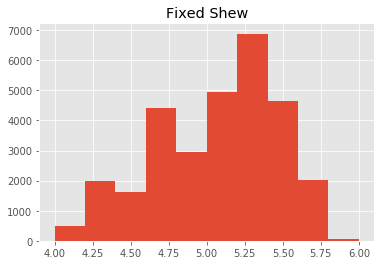

In [19]:
df['X1'] = np.log10(df['X1'])
plt.hist(df['X1'])
plt.title("Fixed Shew")
df['X1'].skew()

0.27374698076891496

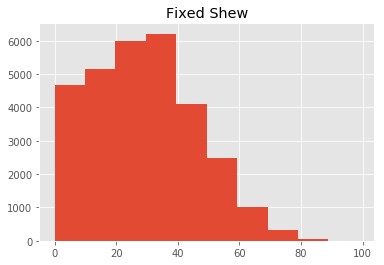

In [20]:
df['X12_ABS'] = np.cbrt(df['X12_ABS'])
plt.hist(df['X12_ABS'])
plt.title("Fixed Shew")
df['X12_ABS'].skew()

0.24408719608956556

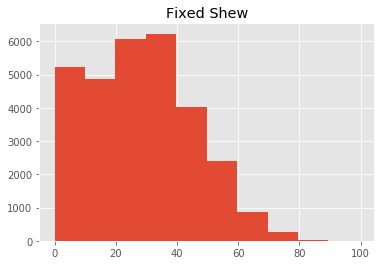

In [21]:
df['X13_ABS'] = np.cbrt(df['X13_ABS'])
plt.hist(df['X13_ABS'])
plt.title("Fixed Shew")
df['X13_ABS'].skew()

0.2430896950960733

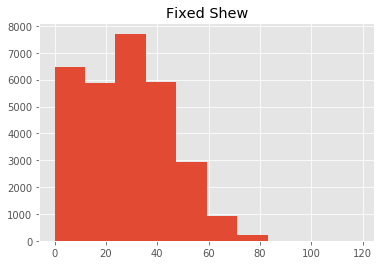

In [22]:
df['X14_ABS'] = np.cbrt(df['X14_ABS'])
plt.hist(df['X14_ABS'])
plt.title("Fixed Shew")
df['X14_ABS'].skew()

0.24825485958557886

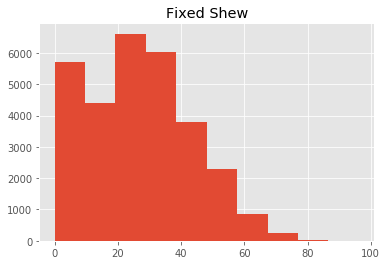

In [23]:
df['X15_ABS'] = np.cbrt(df['X15_ABS'])
plt.hist(df['X15_ABS'])
plt.title("Fixed Shew")
df['X15_ABS'].skew()

0.2622261458854033

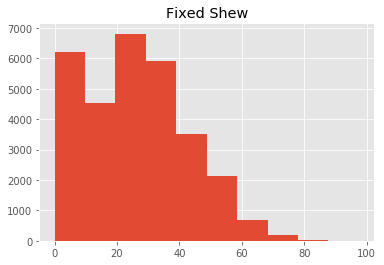

In [24]:
df['X16_ABS'] = np.cbrt(df['X16_ABS'])
plt.hist(df['X16_ABS'])
plt.title("Fixed Shew")
df['X16_ABS'].skew()

0.2725666865305751

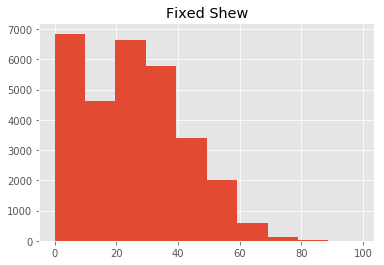

In [25]:
df['X17_ABS'] = np.cbrt(df['X17_ABS'])
plt.hist(df['X17_ABS'])
plt.title("Fixed Shew")
df['X17_ABS'].skew()

0.8355355554768575

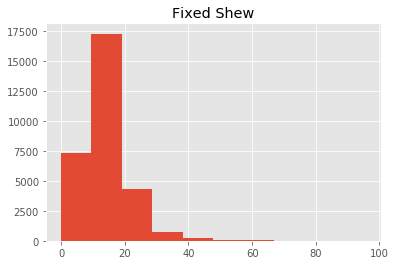

In [26]:
df['X18'] = np.cbrt(df['X18'])
plt.hist(df['X18'])
plt.title("Fixed Shew")
df['X18'].skew()

-0.8528593956290828

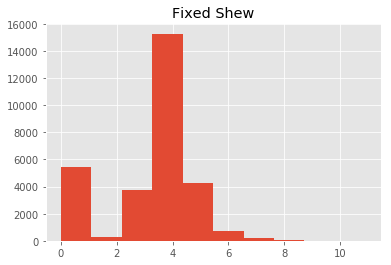

In [27]:
df['X19'] = np.sqrt(np.cbrt(df['X19']))
plt.hist(df['X19'])
plt.title("Fixed Shew")
df['X19'].skew()

-0.7289208621659119

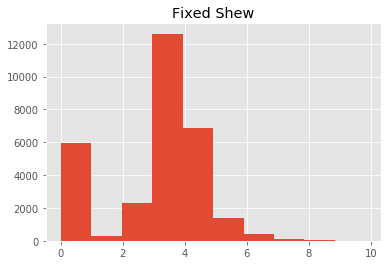

In [28]:
df['X20'] = np.sqrt(np.cbrt(df['X20']))
plt.hist(df['X20'])
plt.title("Fixed Shew")
df['X20'].skew()

-0.6359198076720061

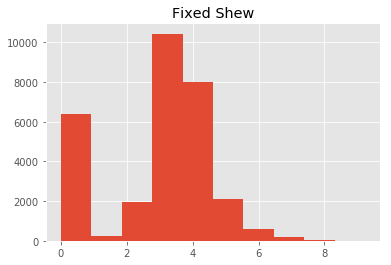

In [29]:
df['X21'] = np.sqrt(np.cbrt(df['X21']))
plt.hist(df['X21'])
plt.title("Fixed Shew")
df['X21'].skew()

-0.6237313525242127

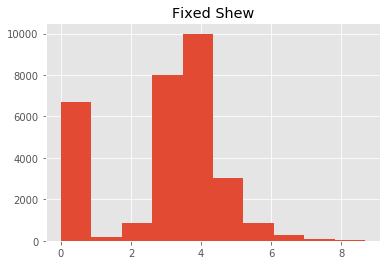

In [30]:
df['X22'] = np.sqrt(np.cbrt(df['X22']))
plt.hist(df['X22'])
plt.title("Fixed Shew")
df['X22'].skew()

-0.5266272915032604

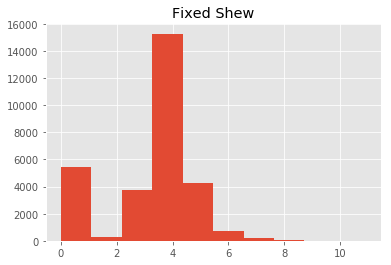

In [31]:
df['X23'] = np.sqrt(np.cbrt(df['X23']))
plt.hist(df['X19'])
plt.title("Fixed Shew")
df['X23'].skew()

In [32]:
df.skew()

X1        -0.513460
X2        -0.424183
X3         0.970972
X4        -0.018742
X18        0.835536
X19       -0.852859
X20       -0.728921
X21       -0.635920
X22       -0.623731
X23       -0.526627
X5_Bins    0.115017
X6_BI      1.301689
X7_BI      1.983384
X8_BI      2.069933
X9_BI      2.383292
X10_BI     2.686696
X11_BI     2.618870
X12_BI    -2.939901
X13_BI    -2.562779
X14_BI    -2.375783
X15_BI    -2.213715
X16_BI    -2.090760
X17_BI    -1.886434
X12_ABS    0.273747
X13_ABS    0.244087
X14_ABS    0.243090
X15_ABS    0.248255
X16_ABS    0.262226
X17_ABS    0.272567
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
dtype: float64

In [33]:
# Defining functin to replace outliers using IQR of each column
def sd_outlier_replace(x): 
    if x > (mean + (3*SD)): 
        x = median
    # If a values is greater than the mean plus three times the standard deviation
    # This value is then replaced by the median of the columns
    elif x < (mean - (3*SD)): 
        x = median
    # If a values is less than the mean minus three times the standard deviation
    # This value is then replaced by the median of the columns
    else: 
        pass
    # Otherwise, leave the value as is 
    return(x)

Text(0.5, 1.0, 'Fixed Outliers')

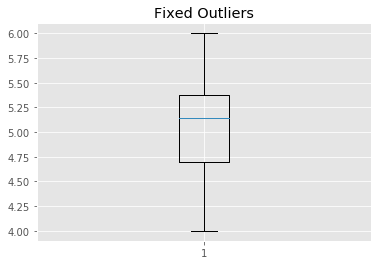

In [34]:
# Applying function to columns with outliers 
mean = df['X1'].mean()
SD = df['X1'].std()
median = df['X1'].median()
df['X1'] = df['X1'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X1'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

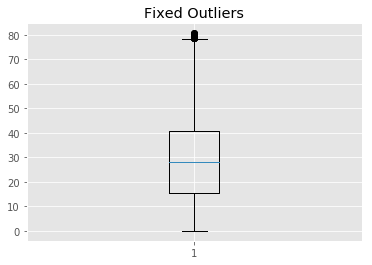

In [35]:
# Applying function to columns with outliers 
mean = df['X12_ABS'].mean()
SD = df['X12_ABS'].std()
median = df['X12_ABS'].median()
df['X12_ABS'] = df['X12_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X12_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

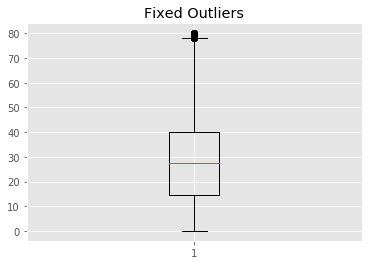

In [36]:
# Applying function to columns with outliers 
mean = df['X13_ABS'].mean()
SD = df['X13_ABS'].std()
median = df['X13_ABS'].median()
df['X13_ABS'] = df['X13_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X13_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

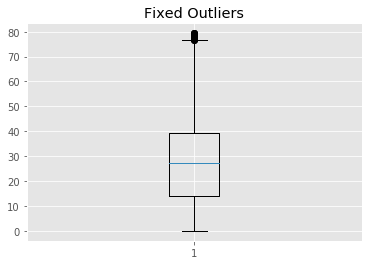

In [37]:
# Applying function to columns with outliers 
mean = df['X14_ABS'].mean()
SD = df['X14_ABS'].std()
median = df['X14_ABS'].median()
df['X14_ABS'] = df['X14_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X14_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

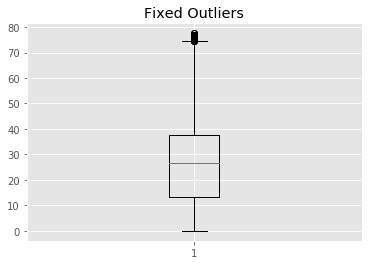

In [38]:
# Applying function to columns with outliers 
mean = df['X15_ABS'].mean()
SD = df['X15_ABS'].std()
median = df['X15_ABS'].median()
df['X15_ABS'] = df['X15_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X15_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

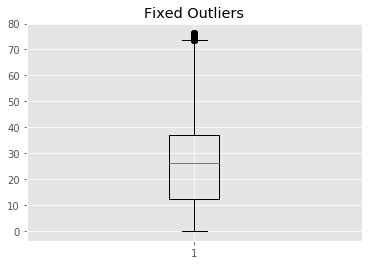

In [39]:
# Applying function to columns with outliers 
mean = df['X16_ABS'].mean()
SD = df['X16_ABS'].std()
median = df['X16_ABS'].median()
df['X16_ABS'] = df['X16_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X16_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

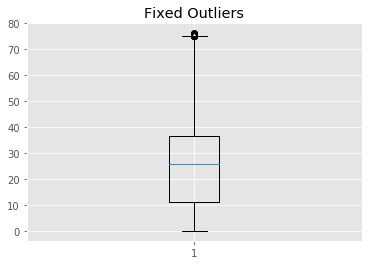

In [40]:
# Applying function to columns with outliers 
mean = df['X17_ABS'].mean()
SD = df['X17_ABS'].std()
median = df['X17_ABS'].median()
df['X17_ABS'] = df['X17_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X17_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

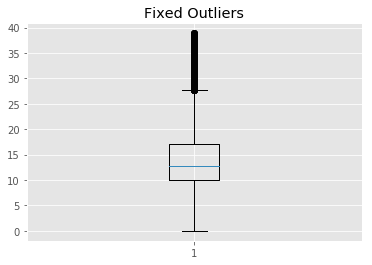

In [41]:
# Applying function to columns with outliers 
mean = df['X18'].mean()
SD = df['X18'].std()
median = df['X18'].median()
df['X18'] = df['X18'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X18'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

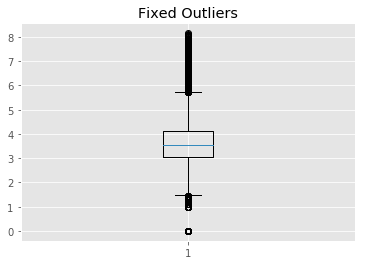

In [42]:
# Applying function to columns with outliers 
mean = df['X19'].mean()
SD = df['X19'].std()
median = df['X19'].median()
df['X19'] = df['X19'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X19'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

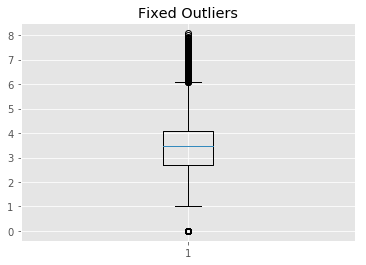

In [43]:
# Applying function to columns with outliers 
mean = df['X20'].mean()
SD = df['X20'].std()
median = df['X20'].median()
df['X20'] = df['X20'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X20'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

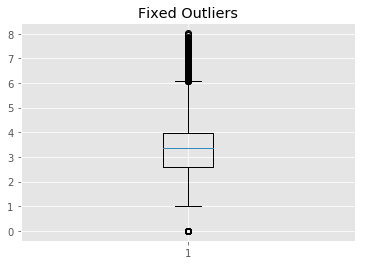

In [44]:
# Applying function to columns with outliers 
mean = df['X21'].mean()
SD = df['X21'].std()
median = df['X21'].median()
df['X21'] = df['X21'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X21'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

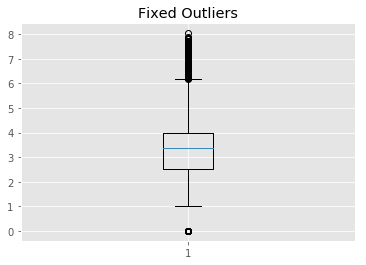

In [45]:
# Applying function to columns with outliers 
mean = df['X22'].mean()
SD = df['X22'].std()
median = df['X22'].median()
df['X22'] = df['X22'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X22'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

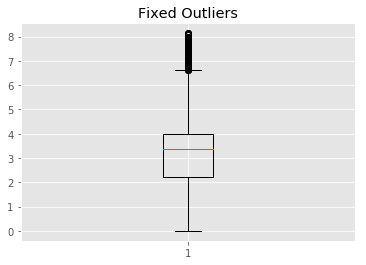

In [46]:
# Applying function to columns with outliers 
mean = df['X23'].mean()
SD = df['X23'].std()
median = df['X23'].median()
df['X23'] = df['X23'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X23'])
plt.title("Fixed Outliers")

In [47]:
dfnorm = df.filter(['X1', "X12_ABS", "X13_ABS", "X14_ABS", "X15_ABS", "X16_ABS", "X17_ABS", "X18", "X19", "X20", "X21", "X22", "X23"], axis=1)
df = df.drop(["X1", 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS', 'X16_ABS', 'X17_ABS', "X18", "X19", "X20", "X21", "X22", "X23"], axis=1)

In [48]:
# Column Names 
cols = dfnorm.columns

# Scaler function from Preprocessing 
scaler = preprocessing.StandardScaler()

# Transforming norm_df
dfnorm = scaler.fit_transform(dfnorm)

# Making DataFrame from Standardized data 
# Using column names defined earlier 
dfnorm = pd.DataFrame(dfnorm, columns=cols)

In [49]:
print(dfnorm)

             X1   X12_ABS   X13_ABS   X14_ABS   X15_ABS   X16_ABS   X17_ABS  \
0     -1.869598 -0.758386 -0.785153 -1.088616 -1.579920 -1.541281 -1.483532   
1      0.034263 -0.866772 -0.935035 -0.794573 -0.699341 -0.636680 -0.606347   
2     -0.271418  0.116536 -0.233725 -0.216424 -0.139167 -0.067265 -0.007117   
3     -0.895980  0.423406  0.476861  0.528327  0.227939  0.296254  0.345181   
4     -0.895980 -0.482617 -0.597292  0.313576  0.054974  0.059507  0.098518   
5     -0.895980  0.655807  0.598303  0.641960  0.013707  0.072582  0.122760   
6      1.550666  2.491521  2.675594  2.833575  0.004727  0.030574  0.041317   
7     -0.159466 -0.348107 -1.209795 -1.111463 -1.221305 -1.217111 -0.993939   
8      0.198058 -0.370485 -0.231441 -0.267715 -0.214034 -0.179264 -0.567066   
9     -1.869598 -1.674517 -1.628779 -1.601722 -1.579920 -0.134046 -0.060862   
10     0.577048 -0.378703 -0.391448 -0.574085 -0.773499 -0.809637 -0.566081   
11     0.855827 -0.333926 -0.016071 -0.351537 -0.368

In [50]:
df = pd.concat([df,dfnorm], axis=1, join='inner')
df.head()

,X2,X3,X4,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23
1,2,2,1,0,1,1,0,0,0,0,...,-0.794573,-0.699341,-0.636680,-0.606347,-1.641267,-0.008108,0.079375,0.140610,-1.686229,0.389500
2,2,2,2,0,0,1,0,0,0,1,...,-0.216424,-0.139167,-0.067265,-0.007117,-0.143924,0.125535,0.079375,0.140610,0.151622,0.720194
3,2,2,2,1,0,0,0,0,0,0,...,0.528327,0.227939,0.296254,0.345181,0.000232,0.229369,0.137420,0.170409,0.172175,0.170829
4,2,2,1,1,0,0,0,0,0,0,...,0.313576,0.054974,0.059507,0.098518,0.000232,1.564731,0.959451,0.963663,0.040988,0.059254
5,1,2,1,2,0,0,0,0,0,0,...,0.641960,0.013707,0.072582,0.122760,0.126985,0.191554,-0.047834,0.140610,0.151622,0.105640


In [51]:
# Checking mean for standardized 
# Want to see mean very close to 0 
df.mean()

X2         1.603753
X3         1.853128
X4         1.551885
X5_Bins    0.937665
X6_BI      0.227274
X7_BI      0.147938
X8_BI      0.140438
X9_BI      0.117004
X10_BI     0.098937
X11_BI     0.102637
X12_BI     0.913397
X13_BI     0.894163
X14_BI     0.882496
X15_BI     0.870996
X16_BI     0.861295
X17_BI     0.843061
X12_M      6.000000
X13_M      5.000000
X14_M      4.000000
X15_M      3.000000
X16_M      2.000000
X17_M      1.000000
X1         0.000062
X12_ABS    0.000025
X13_ABS    0.000026
X14_ABS    0.000036
X15_ABS    0.000053
X16_ABS    0.000051
X17_ABS    0.000049
X18        0.000055
X19        0.000004
X20        0.000060
X21        0.000057
X22        0.000056
X23        0.000054
dtype: float64

In [52]:
# Checking standard deviation of standardized data
# Want std dev of each column close to 1 
df.std()

X2         0.489125
X3         0.790361
X4         0.521969
X5_Bins    0.817328
X6_BI      0.419078
X7_BI      0.355045
X8_BI      0.347447
X9_BI      0.321430
X10_BI     0.298582
X11_BI     0.303489
X12_BI     0.281257
X13_BI     0.307634
X14_BI     0.322025
X15_BI     0.335210
X16_BI     0.345644
X17_BI     0.363749
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X1         0.999975
X12_ABS    1.000024
X13_ABS    1.000023
X14_ABS    1.000014
X15_ABS    0.999992
X16_ABS    0.999994
X17_ABS    0.999997
X18        0.999988
X19        1.000033
X20        0.999979
X21        0.999984
X22        0.999986
X23        0.999990
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feedd4a2358>,
      dtype=object)

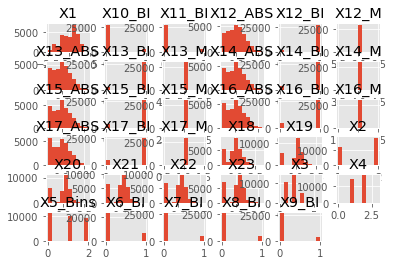

In [53]:
df.hist()

In [54]:
df = pd.concat([df,target], axis=1, join='inner')
df.head()

,X2,X3,X4,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23,Y
1,2,2,1,0,1,1,0,0,0,0,...,-0.699341,-0.636680,-0.606347,-1.641267,-0.008108,0.079375,0.140610,-1.686229,0.389500,1
2,2,2,2,0,0,1,0,0,0,1,...,-0.139167,-0.067265,-0.007117,-0.143924,0.125535,0.079375,0.140610,0.151622,0.720194,1
3,2,2,2,1,0,0,0,0,0,0,...,0.227939,0.296254,0.345181,0.000232,0.229369,0.137420,0.170409,0.172175,0.170829,0
4,2,2,1,1,0,0,0,0,0,0,...,0.054974,0.059507,0.098518,0.000232,1.564731,0.959451,0.963663,0.040988,0.059254,0
5,1,2,1,2,0,0,0,0,0,0,...,0.013707,0.072582,0.122760,0.126985,0.191554,-0.047834,0.140610,0.151622,0.105640,0


In [55]:
y = df.loc[:, ['Y']].values.ravel()

dfnew = df.drop(['Y'], axis=1)

In [56]:
# Recursive Feature Elimination for Y1 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dfnew, y)
# summarize the selection of the attributes
print(rfe.support_)
print(dict(zip(df.columns, rfe.ranking_)))

[False False False False  True False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
{'X2': 9, 'X3': 25, 'X4': 11, 'X5_Bins': 17, 'X6_BI': 1, 'X7_BI': 12, 'X8_BI': 1, 'X9_BI': 6, 'X10_BI': 1, 'X11_BI': 2, 'X12_BI': 3, 'X13_BI': 7, 'X14_BI': 18, 'X15_BI': 14, 'X16_BI': 4, 'X17_BI': 10, 'X12_M': 5, 'X13_M': 8, 'X14_M': 13, 'X15_M': 15, 'X16_M': 16, 'X17_M': 24, 'X1': 23, 'X12_ABS': 31, 'X13_ABS': 28, 'X14_ABS': 19, 'X15_ABS': 20, 'X16_ABS': 21, 'X17_ABS': 32, 'X18': 26, 'X19': 33, 'X20': 27, 'X21': 22, 'X22': 30, 'X23': 29}


In [57]:
# Exporting DataFrame as CSV 
df.to_csv('Final5', ',')

In [58]:
# Logistic Regression 
df.columns.values

array(['X2', 'X3', 'X4', 'X5_Bins', 'X6_BI', 'X7_BI', 'X8_BI', 'X9_BI',
       'X10_BI', 'X11_BI', 'X12_BI', 'X13_BI', 'X14_BI', 'X15_BI',
       'X16_BI', 'X17_BI', 'X12_M', 'X13_M', 'X14_M', 'X15_M', 'X16_M',
       'X17_M', 'X1', 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS',
       'X16_ABS', 'X17_ABS', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'Y'], dtype=object)

In [59]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [61]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [62]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5650,  230],
       [1151,  469]])

Text(0.5, 257.44, 'Predicted label')

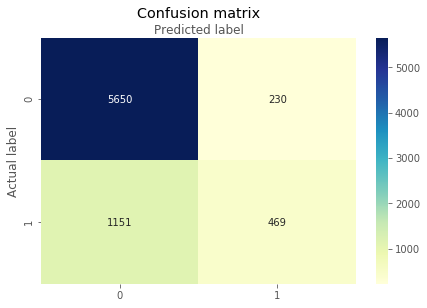

In [63]:
import seaborn as sns


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8158666666666666
Precision: 0.670958512160229
Recall: 0.2895061728395062


In [65]:
# Feature Importance 
from sklearn import metrics 
from sklearn.ensemble import ExtraTreesClassifier

# Fit an Extra Trees model to the data 
model = ExtraTreesClassifier()
model.fit(X,y)

# Display the relative importance of each attribute 
#print(model.feature_importances_)
print(dict(zip(df.columns, model.feature_importances_)))

{'X2': 0.012593905185787336, 'X3': 0.038069593648270283, 'X4': 0.02216099156107685, 'X5_Bins': 0.02960311658418851, 'X6_BI': 0.06465085622884781, 'X7_BI': 0.042716494538444734, 'X8_BI': 0.04834974915827306, 'X9_BI': 0.010466426431556973, 'X10_BI': 0.018261716107138146, 'X11_BI': 0.012778043594747466, 'X12_BI': 0.009198365487352042, 'X13_BI': 0.006089571011254344, 'X14_BI': 0.005928589696746694, 'X15_BI': 0.006298266716999094, 'X16_BI': 0.006413775948814973, 'X17_BI': 0.00812172229496239, 'X12_M': 0.0, 'X13_M': 0.0, 'X14_M': 0.0, 'X15_M': 0.0, 'X16_M': 0.0, 'X17_M': 0.0, 'X1': 0.06228847032941705, 'X12_ABS': 0.05678347093373852, 'X13_ABS': 0.0536662750629869, 'X14_ABS': 0.05030660598971045, 'X15_ABS': 0.049527763738199324, 'X16_ABS': 0.048160355534416346, 'X17_ABS': 0.04808674586272735, 'X18': 0.052227619181234156, 'X19': 0.05073671717725383, 'X20': 0.047492576888987406, 'X21': 0.046538952310988514, 'X22': 0.04620413284868859, 'X23': 0.04627912994719082}


In [66]:
# Fin 